In [146]:
#import necessary libaries
#for data analysis
import pandas as pd
import numpy as np
  
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


#for evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
#to avoid display of warnings
import warnings
warnings.filterwarnings('ignore')

In [185]:
#these are used for combined,at  aago evaluation
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [16]:
#to load dataset
ds = pd.read_csv("C:\\Users\\welcome\\Downloads\\heart - heart.csv")
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#for better understanding,remame the headers
ds.columns =['age','sex','chest_pain_type','resting_blood_sugar','cholesterol','fasting_blood_sugar','rest_ecg','max_hear_rate',
            'exercise_induced_angima','st_depression','st_slope','num_major_vessels','thalassemia','target']
ds.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_hear_rate,exercise_induced_angima,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#to know the data infomation 
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_sugar      303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_hear_rate            303 non-null    int64  
 8   exercise_induced_angima  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [21]:
#statistical analysis
ds.describe()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_hear_rate,exercise_induced_angima,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
#to check for missing values 
print(ds.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_sugar        0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_hear_rate              0
exercise_induced_angima    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<AxesSubplot:>

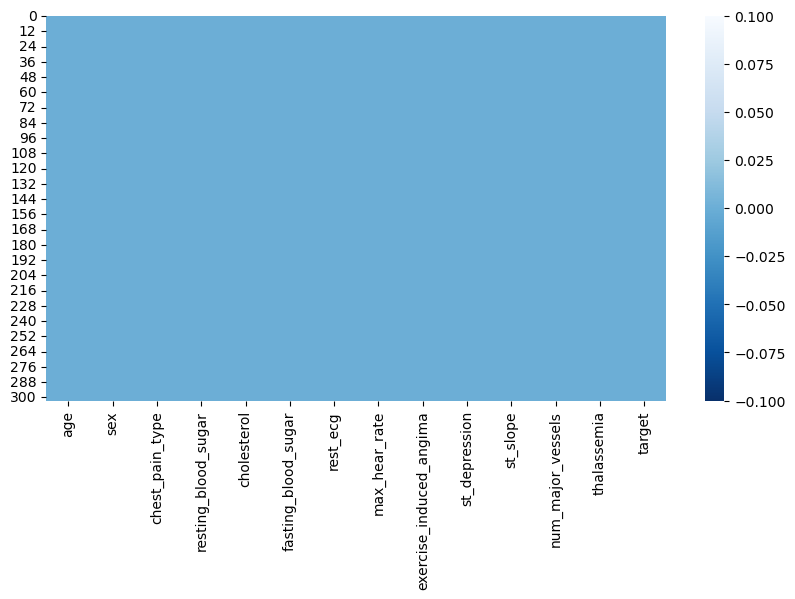

In [27]:
#to visualize missing data
plt.figure(figsize=(10,5))
sns.heatmap(ds.isnull(),cbar =True,cmap='Blues_r')

Based on the available information,it shows that there are no missing values

#univariate exploratory data analysis
looking at each column to understand the data

In [166]:
ds.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_hear_rate',
       'exercise_induced_angima', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_ctg', 'label'],
      dtype='object')

<AxesSubplot:xlabel='thalassemia'>

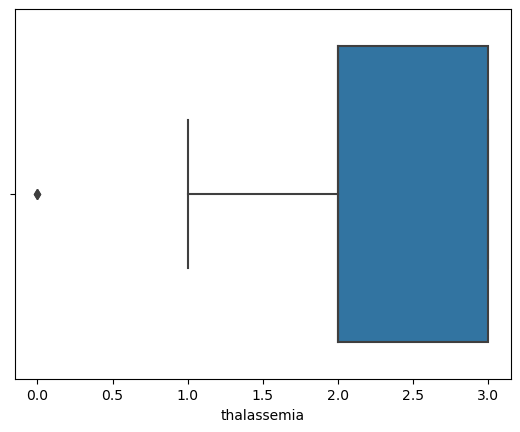

In [30]:
#to check for outliers in column
sns.boxplot(x=ds['thalassemia'])

This revealed just one outlier

<AxesSubplot:xlabel='cholesterol'>

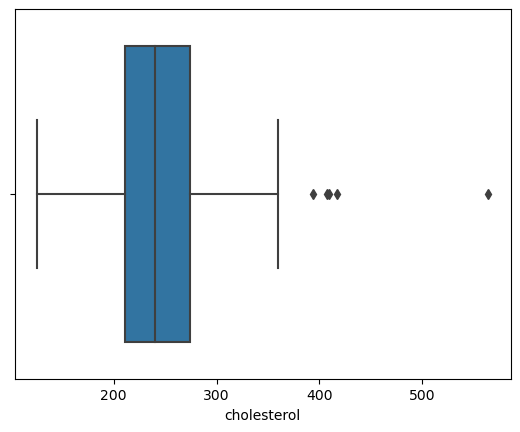

In [168]:
sns.boxplot(x=ds['cholesterol'])

<AxesSubplot:xlabel='resting_blood_sugar'>

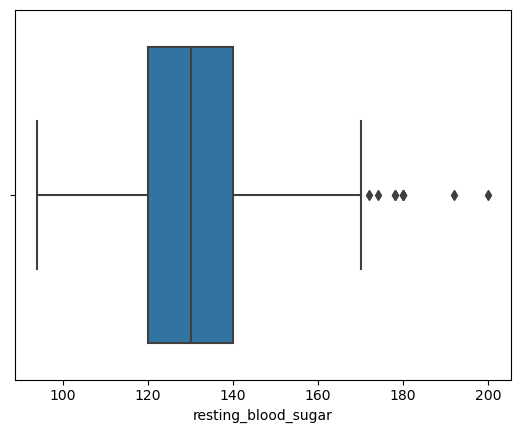

In [32]:
sns.boxplot(x=ds['resting_blood_sugar'])

This shows that there are more outliers in the resting blood sugar column

<AxesSubplot:xlabel='max_hear_rate'>

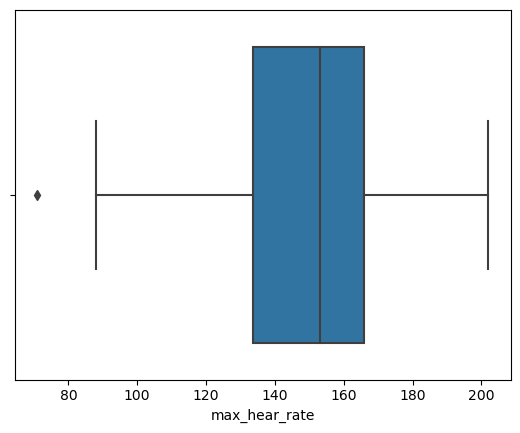

In [33]:
sns.boxplot(x=ds['max_hear_rate'])

<AxesSubplot:xlabel='fasting_blood_sugar'>

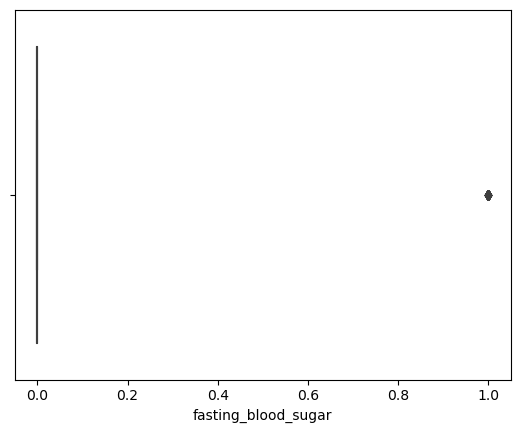

In [34]:
sns.boxplot(x=ds['fasting_blood_sugar'])

Text(0.5, 1.0, 'Total number of Patients based on age group')

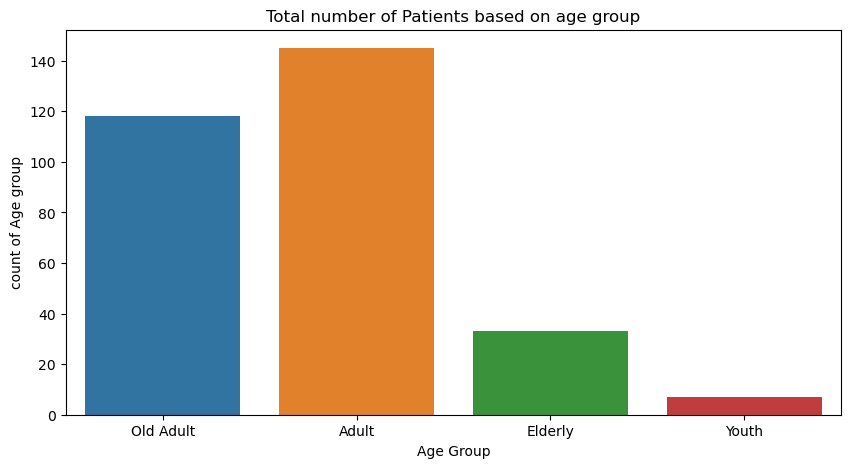

In [169]:
#to regroup the ages
def age_bracket(age):
    if age <=35:
        return'Youth'
    elif age <=55:
        return 'Adult'
    elif age <=65:
        return'Old Adult'
    else:
        return 'Elderly'
#to create a new column
ds['age_bracket']= ds['age'].apply(age_bracket)


#investigating the age group of patients
plt.figure(figsize =(10,5))
sns.countplot(x ='age_bracket',data = ds)
plt.xlabel('Age Group')#to label
plt.ylabel('count of Age group')#for labelling
plt.title('Total number of Patients based on age group')

Text(0.5, 1.0, 'Patients based on gender')

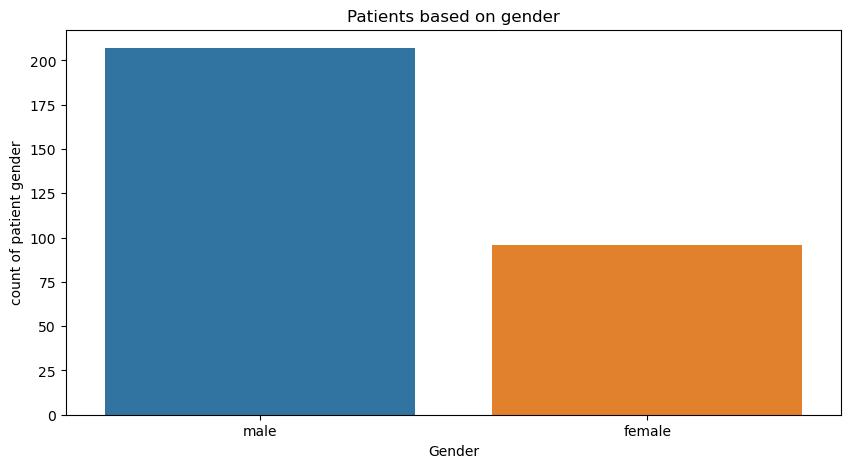

In [171]:
#create a new function for gender
def gender(sex):
    if sex ==1:
        return'male'
    else:
        return'female'
ds['gender']=ds['sex'].apply(gender)  

plt.figure(figsize =(10,5))
sns.countplot(x ='gender',data = ds)
plt.xlabel('Gender')#to label
plt.ylabel('count of patient gender')#for labelling
plt.title('Patients based on gender')

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_hear_rate,exercise_induced_angima,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult,male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult,male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult,female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult,male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult,female


Text(0.5, 1.0, 'Total number of Patients')

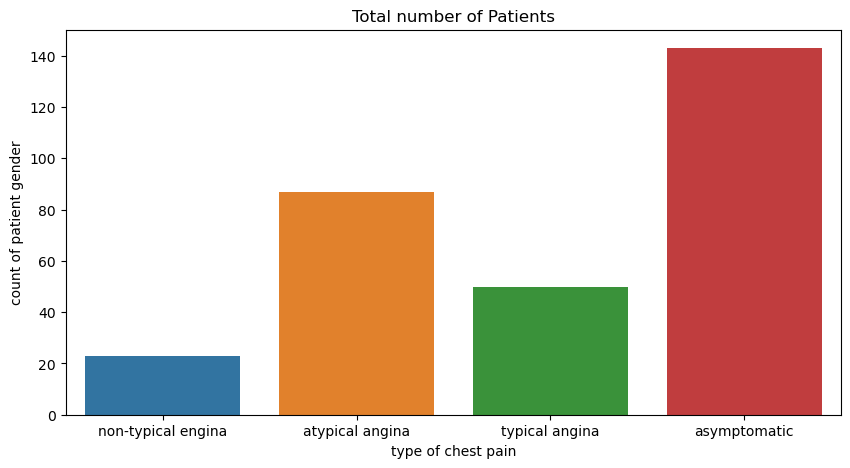

In [44]:
def chest_pain(cp):
    if cp == 1:
        return'typical angina'
    elif cp ==2:
        return'atypical angina'
    elif cp == 3:
        return 'non-typical engina'
    else:
        return'asymptomatic'
    
ds['cp_ctg']=ds['chest_pain_type'].apply(chest_pain)  

plt.figure(figsize =(10,5))
sns.countplot(x ='cp_ctg',data = ds)
plt.xlabel('type of chest pain')#to label
plt.ylabel('count of patient gender')#for labelling
plt.title('Total number of Patients based on chest pain severerity')

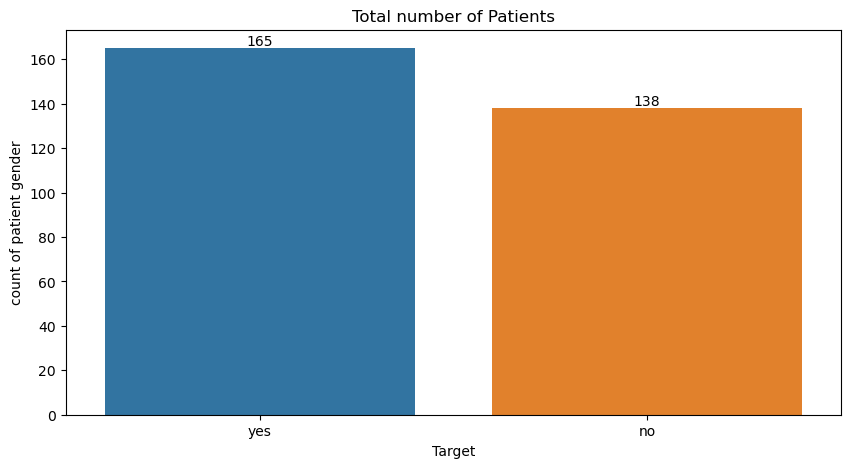

In [50]:
 def label(tg):
    if tg ==1:
        return 'yes'
    else:
        return'no'
    
ds['label']=ds['target'].apply(label)  

plt.figure(figsize =(10,5))
ax =sns.countplot(x ='label',data = ds)
values = ds['target'].value_counts(ascending = False).values
plt.xlabel('Target') #to label
plt.ylabel('count of patient gender')#for labelling
plt.title('Total number of Patients')

ax.bar_label(container = ax.containers[0],labels = values);#

In [52]:
ds.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_hear_rate,exercise_induced_angima,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_ctg,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult,male,non-typical engina,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult,male,atypical angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult,female,typical angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult,male,typical angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult,female,asymptomatic,yes


Text(0.5, 1.0, 'age group vs target feature')

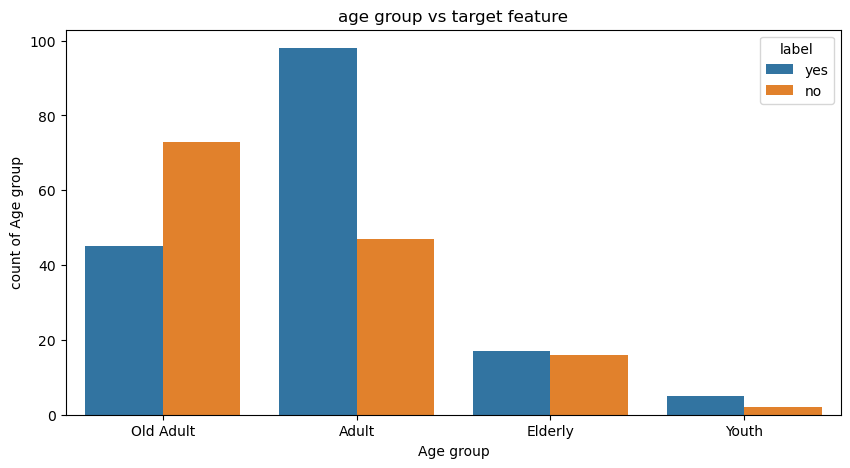

In [54]:
#comparing age group and the target feature
plt.figure(figsize =(10,5))
sns.countplot(x ='age_bracket',data = ds, hue ='label')
plt.xlabel('Age group')#to label
plt.ylabel('count of Age group')#for labelling
plt.title('age group vs target feature')

In [ ]:
This showed that Adults (<=55) had the highest number of heart disease,followed by old adults(<=65) which seems surprising.

Text(0.5, 1.0, 'Analysing patients gender vs target feature')

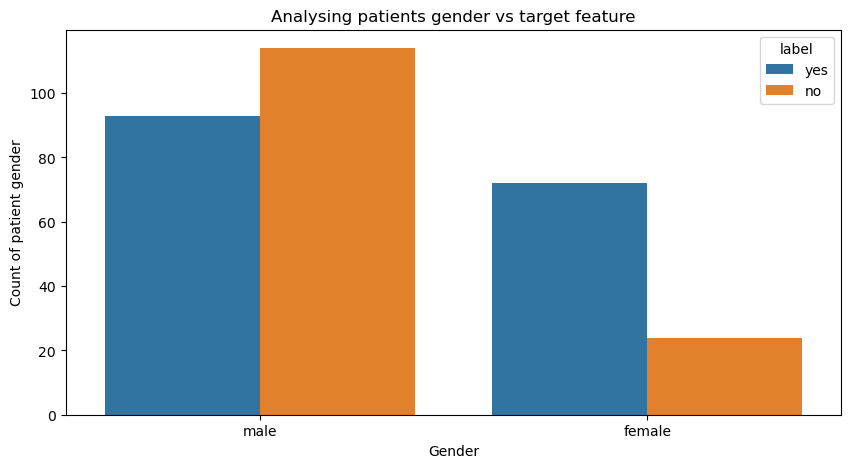

In [57]:
plt.figure(figsize =(10,5))
sns.countplot(x ='gender',data = ds,hue = 'label')
plt.xlabel('Gender')#to label 
plt.ylabel('Count of patient gender')#for labelling
plt.title('Analysing patients gender vs target feature')

##Also,most females are affected more than  the males.

Text(0.5, 1.0, 'patients gender vs chest pain feature')

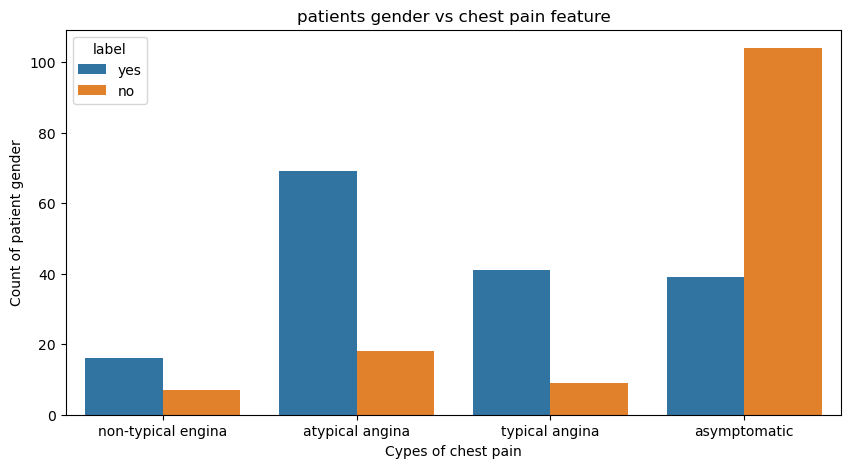

In [59]:
plt.figure(figsize =(10,5))
sns.countplot(x ='cp_ctg',data = ds,hue = 'label')
plt.xlabel('Cypes of chest pain')#to label
plt.ylabel('Count of patient gender')#for labelling
plt.title('Total patients' gender vs chest pain feature')  

Text(0.5, 1.0, 'Seperated patients gender vs chest pain feature')

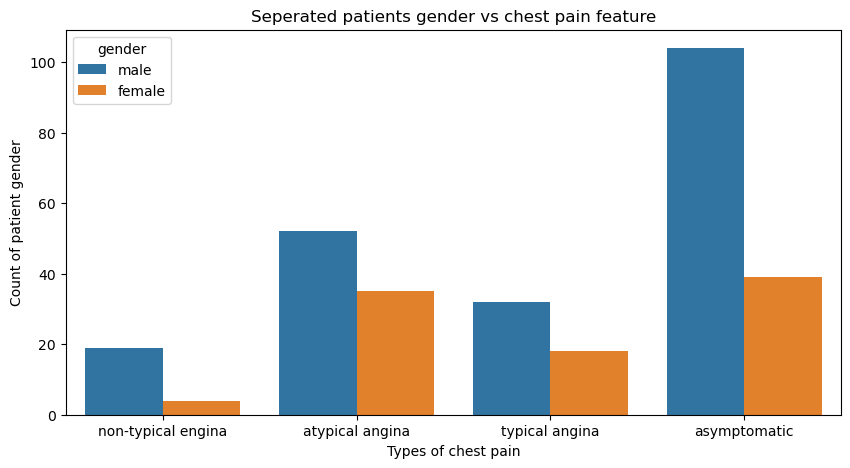

In [173]:
plt.figure(figsize =(10,5))
sns.countplot(x ='cp_ctg',data = ds,hue = 'gender')
plt.xlabel('Types of chest pain')#to label
plt.ylabel('Count of patient gender')#for labelling
plt.title('Seperated patients gender vs chest pain feature')  

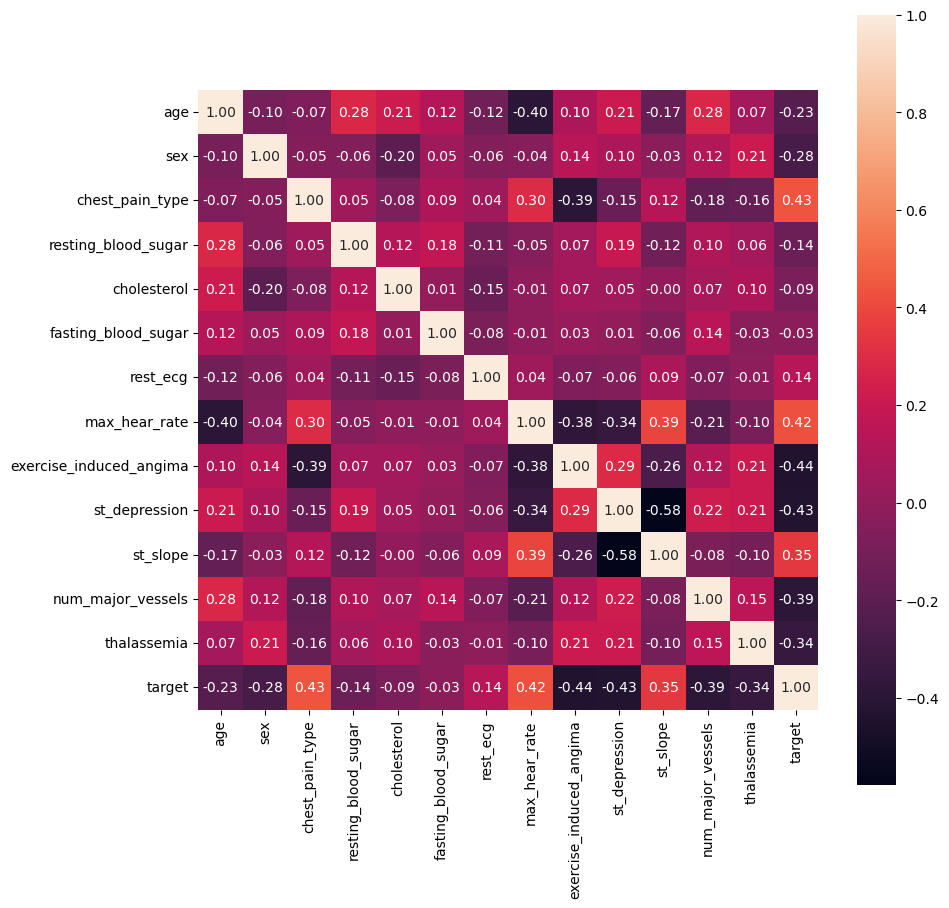

In [63]:
plt.figure(figsize=(10,10))
hm = sns.heatmap(ds.corr(),cbar = True, annot=True,square = True,fmt = '.2f',annot_kws ={'size':10}) 
#for correlation

According to this map,there is a strong relationship between chest pain type and target and age has no relationship with heart disease which means any body of any age can be a victim .

Data preprocessing

In [202]:
#to remove the newly created columns,crete a new dataframe
df = ds[['age','sex','chest_pain_type','resting_blood_sugar','cholesterol','fasting_blood_sugar','rest_ecg','max_hear_rate',
            'exercise_induced_angima','st_depression','st_slope','num_major_vessels','thalassemia']]
label = ds[['target']]#this labe is the answer for the training of the dataframe

In [188]:
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_hear_rate,exercise_induced_angima,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [189]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [190]:
df.dtypes
#to know the data types

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_sugar          int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_hear_rate                int64
exercise_induced_angima      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [191]:
#normalization :dealing with outlayers for resting blood sugar,cholesterol,thalassema
scaler = MinMaxScaler()# will transform the figures to 0 an 1 for easier reading by the machine
df['Scaled_RBP']=scaler.fit_transform(df[['resting_blood_sugar']].values.reshape(-1,1))
df['Scaled_chol']=scaler.fit_transform(df[['cholesterol']].values.reshape(-1,1))
df['Scaled_thal']=scaler.fit_transform(df[['thalassemia']].values.reshape(-1,1))
df['Scaled_max_heart_rate'] = scaler.fit_transform(df[['max_hear_rate']].values.reshape(-1,1))
#df.drop(['resting_blood_sugar','thalassemia','cholesterol','max_hear_rate'],axis = 1,inplace = True)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_hear_rate,exercise_induced_angima,st_depression,st_slope,num_major_vessels,thalassemia,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0.481132,0.244292,0.333333,0.603053
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0.339623,0.283105,0.666667,0.885496
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0.339623,0.178082,0.666667,0.770992
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0.245283,0.251142,0.666667,0.816794
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0.245283,0.520548,0.666667,0.702290


In [192]:
#to remove the columns we have changed ,leaving only the ones we need  using minmax
df.drop(['resting_blood_sugar','thalassemia','cholesterol','max_hear_rate'],axis = 1,inplace = True)
df.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angima,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


Machine learning algorithms

In [199]:
#test size of 0.2 means using 20% as sample to test,training on 80% and testing on 20%
#random state means to select figures randomly
#splt the dataset into training and testing sets.
#x is the question,y is the answer.
#Xtrain is the practise question,ytrain is the answer,xtest is the evaluation question while ytest is the answer
X_train, x_test, y_train, y_test = train_test_split(df, label, test_size = 0.2, random_state = 42)

In [200]:
#practise question
X_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angima,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [112]:
df.shape

(303, 13)

In [113]:
label.shape

(303, 1)

In [117]:
y_train.head(3)
#practise answer

,target
132,1
202,0
196,0


In [120]:
x_test.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angima,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626


In [122]:
y_test.head(3)

,target
179,0
228,0
111,1


In [125]:
#model building
#Logistic algorithm
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ly_pred = logreg.predict(x_test)


print('Logistic Regression')
print('Accuracy:',accuracy_score(y_test,ly_pred))
print('Precision:',precision_score(y_test,ly_pred))
print('Recall:',recall_score(y_test,ly_pred))
print('F1-SCORE:',f1_score(y_test,ly_pred))
print('AUC-ROC:', roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-SCORE: 0.8571428571428571
AUC-ROC: 0.8529094827586207


This tool did well in precision 

In [126]:
ly_pred# predicted answer using the available sample

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [127]:
y_test# real answer

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [128]:
x_test

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angima,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0.481132,0.356164,1.000000,0.541985


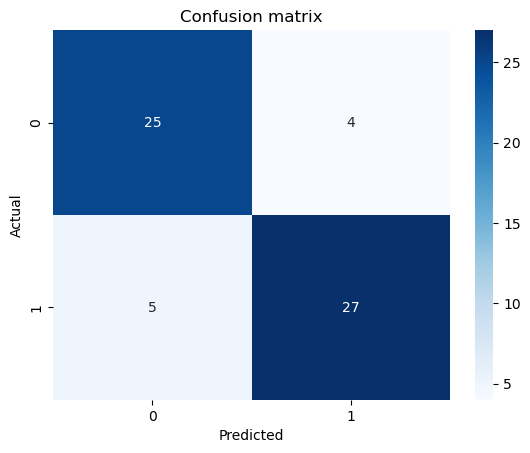

In [129]:
#using confusion matrix to train
lcm = confusion_matrix(y_test,ly_pred)
#to visualize the confusion matrix
sns.heatmap(lcm,annot = True,cmap ='Blues',fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [139]:
#3 ==random model classifier
rmc = RandomForestClassifier()
rmc.fit(X_train,y_train)
rmc_pred = rmc.predict(x_test)


print('Logistic Regression')
print('Accuracy:',accuracy_score(y_test,rmc_pred))
print('Precision:',precision_score(y_test,rmc_pred))
print('Recall:',recall_score(y_test,rmc_pred))
print('F1-SCORE:',f1_score(y_test,rmc_pred))
print('AUC-ROC:', roc_auc_score(y_test,rmc_pred))


Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1-SCORE: 0.8787878787878787
AUC-ROC: 0.8669181034482758


The RMC did best in recall.

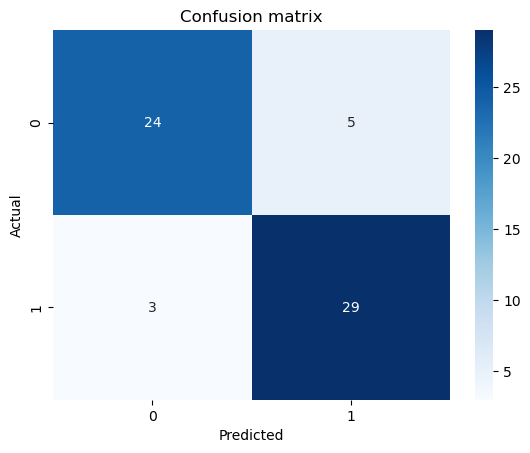

In [140]:
rmc = confusion_matrix(y_test,rmc_pred)
#to visualize the confusion matrix
sns.heatmap(rmc,annot = True,cmap ='Blues',fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [150]:
#machine learning algoriths will be applied to the dataset,evaluating using 8 evaluation tools at once
classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(),'K-Nearest Neighbours'],
               [SVC(),'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state =42),'Decision tree'],
               [LogisticRegression(),'Logistic Regression']
              ]

In [151]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassifier(random_state=42), 'Decision tree'

In [156]:
#create a an empty dictionary for the tools
acc_list = {}
precision_list={}
recall_list={}
roc_list={} 
for classifier in classifiers:
    model = classifier[0]
    model .fit(X_train,y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test,pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred)
    
    #to change it to percentage
    acc_list[model_name] =  ([str(round(a_score*100,2))+ '%'])
    precision_list[model_name] =  ([str(round(p_score*100,2))+'%'])
    recall_list[model_name]  = ([str(round(r_score*100,2))+'%'])
    roc_list[model_name] =   ([str(round(roc_score*100,2))+'%'])                       
    
    if model_name != classifiers[-1][0]:
        print('')

In [184]:
acc_list

{'XGB Classifier': ['83.61%'],
 'Random Forest': ['83.61%'],
 'K-Nearest Neighbours': ['75.41%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic Regression': ['85.25%']}

In [158]:
recall_list

{'XGB Classifier': ['81.25%'],
 'Random Forest': ['84.38%'],
 'K-Nearest Neighbours': ['71.88%'],
 'SVC': ['71.88%'],
 'Naive Bayes': ['84.38%'],
 'Decision tree': ['78.12%'],
 'Logistic Regression': ['84.38%']}

In [159]:
precision_list

{'XGB Classifier': ['86.67%'],
 'Random Forest': ['84.38%'],
 'K-Nearest Neighbours': ['79.31%'],
 'SVC': ['65.71%'],
 'Naive Bayes': ['90.0%'],
 'Decision tree': ['92.59%'],
 'Logistic Regression': ['87.1%']}

In [160]:
roc_list

{'XGB Classifier': ['83.73%'],
 'Random Forest': ['83.57%'],
 'K-Nearest Neighbours': ['75.59%'],
 'SVC': ['65.25%'],
 'Naive Bayes': ['87.02%'],
 'Decision tree': ['85.61%'],
 'Logistic Regression': ['85.29%']}

In [180]:
print('Accuracy score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.61%,83.61%,75.41%,65.57%,86.89%,85.25%,85.25%


In [ ]:

ax=sns.countplot(x = s1['acc_list'],order = s1['acc_list'].value_counts(ascending = False).index)
values = ['a_score'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0],labels = values);#to add label to visuals

In [161]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.67%,84.38%,79.31%,65.71%,90.0%,92.59%,87.1%


In [162]:
print('Accuracy score')
s3 = pd.DataFrame(recall_list)
s3.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.25%,84.38%,71.88%,71.88%,84.38%,78.12%,84.38%


In [163]:
print('ROC score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.73%,83.57%,75.59%,65.25%,87.02%,85.61%,85.29%
